# This is an example show how radial basis function interpolation works in 1D
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AmosZhu/Dizhong_PythonUtils/blob/main/Notebooks/Interpolations/RBF_Interpolation.ipynb)

A Gaussian radial basic function is defined

\begin{equation}
  F(r)=e^{(-\epsilon r)^2}
\end{equation}


The radial basis interpolation is thus defined
$$ y=\sum_{k=0}^{n} w_k F(||x-x_k||) $$
Where $r=||x-x_k||$ denote the Euclidian norm.
Thus given a set of $ (x_0,y_0), (x_1,y_1), \dots, (x_n,y_n)$, we subsitute to equation , we will get

\begin{equation}
   \underbrace{
   \begin{bmatrix}
      F(x_0-x_0) &\dots &F(x_0-x_n) \\
      \vdots &\ddots &\vdots \\
      F(x_n-x_0) &\dots &F(x_n-x_n)
   \end{bmatrix}}_{A}
   \cdot
   \underbrace{
   \begin{bmatrix}
      w_0 \\ \vdots\\ w_n
   \end{bmatrix}}_{W}=
   \underbrace{
   \begin{bmatrix}
      y_0\\ \vdots \\ y_n
   \end{bmatrix}}_{y}
\end{equation}

We then solve the $W$ by linear least square.
Given a set of new points$(\hat{x}_0,  \hat{x}_1, \cdots, \hat{x}_m)$ to be interpolated, the value can be reconstructed via
\begin{equation}
   \begin{bmatrix}
      F(\hat{x}_0-x_0) &\dots &F(\hat{x}_m-x_n) \\
      \vdots &\ddots &\vdots \\
      F(\hat{x}_m-x_0) &\dots &F(\hat{x}_m-x_n)
   \end{bmatrix}\cdot W=\hat{y}
\end{equation}

#### RBF Example
 We take some sample points from a function, and we would like to reconstruct the original function by RBF.

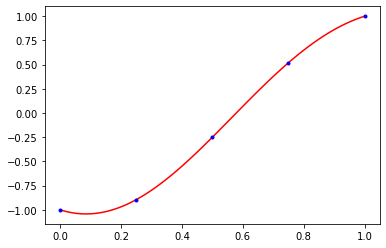

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Let's frist define a ground truth function and we are going to reconstructed this one
f_gt = lambda x: x ** 2 - x - np.cos(np.pi * x)
f_RBF = lambda x, e: np.exp(-(e * x) ** 2)

# Draw the function
x = np.linspace(0, 1, 100)
x_sample = np.linspace(0, 1, 5)  # take five sample from the curve
plt.plot(x, f_gt(x), 'r-')
plt.plot(x_sample, f_gt(x_sample), 'b.')
plt.show()

Let's first compute the weight vector $W$. Then give a set of new points, plot the reconstruction line

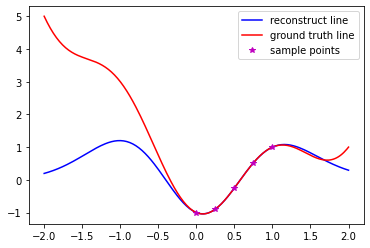

In [2]:
# Use the sample point to compute weight vector W
y_sample = f_gt(x_sample)
r = np.sqrt((x_sample[..., None] - x_sample[None, ...]) ** 2)
A = f_RBF(r, 1)
W = np.linalg.lstsq(A, y_sample, rcond=None)[0]

# Now give a new set of points, and reconstruct the line
x_hat = np.linspace(-2, 2, 200)
r = np.sqrt((x_hat[..., None] - x_sample[None, ...]) ** 2)
A_hat = f_RBF(r, 1)
y_hat = A_hat @ W

plt.plot(x_hat, y_hat, 'b-')
plt.plot(x_hat, f_gt(x_hat), 'r-')
plt.plot(x_sample, f_gt(x_sample), 'm*')
plt.legend(["reconstruct line", "ground truth line", "sample points"])
plt.show()

#### Example fo chaning RBF kernel
We can change the kernel of the RBF, we see previsou example we are using a Gaussian radial basis kernel. Now we change it to another radial basis kernel defined as
\begin{equation}
  F(r)=r^2\log{r}
\end{equation}

Notice the function is using log, it only accept some value positive, normally it will be used in 2D image space, but here is an 1D example.

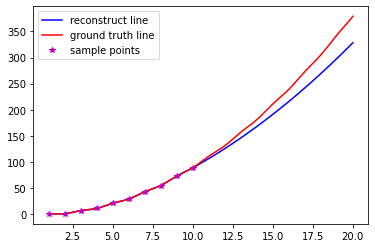

In [3]:
f_RBF = lambda x: x ** 2 * np.log(x + 1e-10)

x_sample = np.linspace(1, 10, 10)
y_sample = f_gt(x_sample)
r = np.sqrt((x_sample[..., None] - x_sample[None, ...]) ** 2)
A = f_RBF(r)
W = np.linalg.lstsq(A, y_sample, rcond=None)[0]

# Now give a new set of points, and reconstruct the line
x_hat = np.linspace(1, 20, 200)
r = np.sqrt((x_hat[..., None] - x_sample[None, ...]) ** 2)
A_hat = f_RBF(r)
y_hat = A_hat @ W

plt.plot(x_hat, y_hat, 'b-')
plt.plot(x_hat, f_gt(x_hat), 'r-')
plt.plot(x_sample, f_gt(x_sample), 'm*')
plt.legend(["reconstruct line", "ground truth line", "sample points"])
plt.show()